In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [3]:
#Reading the dataset
df = pd.read_csv("diabetes.csv")

In [3]:
# overview of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# To get the total number of columns:
total_columns = len(df.columns)
print("Total Columns:", total_columns)

Column Names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Total Columns: 9


In [6]:
# checking the Data type of attributes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# There are some values 0. which for sure considered to be missing one
df[['BloodPressure','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]==0

,BloodPressure,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,True,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
763,False,False,False,False,False,False
764,False,False,False,True,False,False
765,False,False,False,False,False,False
766,False,False,True,True,False,False


# Data Preprocessing

In [8]:
#shape of the dataset
df.shape

(768, 9)

unique values for each variable in the dataset

In [9]:
#checking unique values
val = ['BloodPressure','Glucose','SkinThickness','Insulin','BMI']
for i in val:
 print(df[i].unique())

[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]
[  0  94 168  88 543 846 175 230  83  96 235 146 115 140 110 245  54 192
 207  70 240  82  36  23 

In [10]:
# Checking the count of value 0 in the variables
val = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
for i in val:
    z = 0
    for x in (df[i]):
        if x == 0:
            z = z + 1
    print(i,z)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0


In the dataset, it is important to note that the variables, except for Pregnancies and Outcome, cannot logically have a value of 0. This is due to the fact that certain physiological measures, such as Glucose Level and Blood Pressure, cannot be validly recorded as 0. Having a 0 value for such features would be inconsistent with the real-world context and medical understanding.

Specifically, variables like Glucose Level, Blood Pressure, Skin Thickness, Insulin, BMI (Body Mass Index), and Diabetes Pedigree Function are all expected to have non-zero values under normal circumstances. Therefore, any occurrence of a value of 0 for these features within the dataset could be indicative of incorrect or incomplete information.

As a result, any instances within the dataset where these variables possess a value of 0 should be thoroughly reviewed and treated as potentially erroneous or requiring further investigation. Ensuring accurate and meaningful data is essential for reliable analysis and modeling.



In [11]:
# Replacing the 0 value in the variables - Glucose, BloodPressure, SkinThickness, Insulin,BMI
#replacing the missing values with the mean
val = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in val:
    df[i].replace(0,df[i].mean(),inplace=True)


I have change all the zero values to their column mean. as the data set is already small we need observation to make prediction more precisely.

our target varible is baniry where 1 indicate non diabetic and 0 indicate diabetic.

# EDA

During the exploratory data analysis (EDA) phase, I will examine various aspects of the dataset. Firstly, I will investigate the distribution of the data to understand the patterns and variations present in each variable. This will help me identify potential outliers and gain insights into the overall characteristics of the dataset.

Subsequently, I will explore the correlations between different features to understand how they are related to each other. This will enable me to identify any strong associations or dependencies between variables, which may be useful for feature selection or engineering.

Finally, I will examine the relationship between the target variable (the variable we want to predict or analyze) and the independent variables (features). This step is crucial to determine how each independent variable impacts the target variable. It will provide insights into which features are significant predictors and potentially influence the outcome variable.

By conducting a thorough exploratory data analysis, I aim to gain a comprehensive understanding of the dataset and lay the foundation for further analysis, modeling, and decision-making based on the insights obtained.

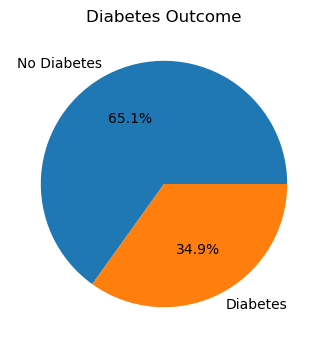

In [13]:


plt.figure(figsize=(4, 4))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Diabetes Outcome')
plt.show()


where Percentage of diabetic patients: 34.90 and Percentage of non-diabetic patients: 65.10. as we can see that only 34.90 percent have Diabetes but this is sufficient to make prediction. we can proceed with our target variable. 

### Age Distribution and Diabetes

/home/umairchohan/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/home/umairchohan/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


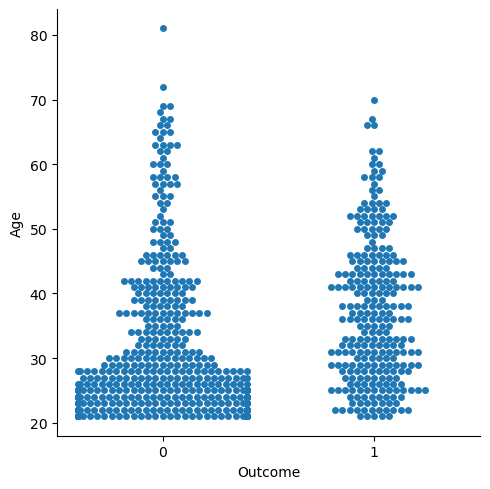

In [14]:
sns.catplot(x="Outcome", y="Age", kind="swarm", data=df)

The graphical representation indicates a noticeable trend in the dataset. The majority of patients fall within the age group of 20 to 30 years, suggesting a higher representation of young adults. However, it is observed that individuals aged between 40 and 55 years are more susceptible to diabetes compared to other age groups. As a result, the number of diabetic patients is higher in this age range.

The larger population of adults in the 20-30 years age group also contributes to a higher count of patients with diabetes in this category, despite a lower prevalence of diabetes in this specific age range. This highlights the significance of age as a contributing factor to diabetes prevalence.

Overall, the analysis indicates the importance of age in understanding the distribution of diabetes among patients and emphasizes the need to consider age-related patterns while interpreting the dataset.

### Glucose and Diabetes

Text(0.5, 1.0, 'Glucose vs Diabetes')

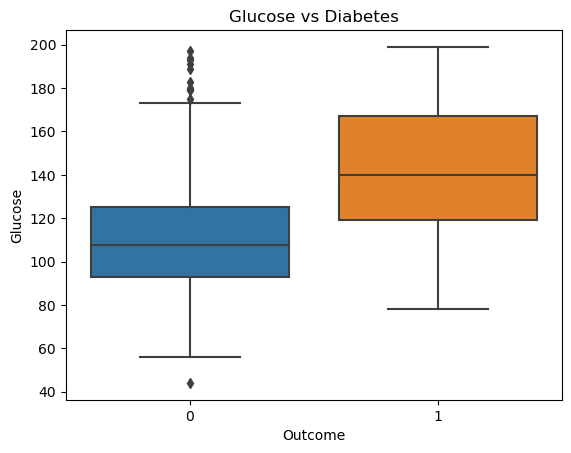

In [15]:
sns.boxplot(x='Outcome', y='Glucose', data=df).set_title('Glucose vs Diabetes')

Glucose level appears to be a crucial factor in distinguishing between diabetic and non-diabetic patients. Patients with a median glucose level below 120 are more likely to be non-diabetic, while those with a median glucose level above 140 are more likely to be diabetic. This indicates that higher glucose levels can serve as a strong indicator of diabetes.

The analysis emphasizes the significance of glucose level as a reliable predictor of diabetes status. Patients with elevated glucose levels should be closely monitored and considered at higher risk for diabetes, while those with lower glucose levels may have a lower likelihood of being diabetic. It highlights the importance of glucose level assessments in diagnosing and managing diabetes.


### Blood Pressuse and Diabetes

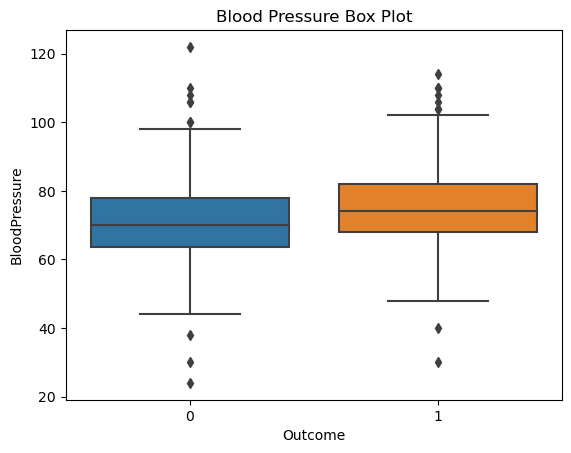

In [16]:

# Create the box plot
sns.boxplot(x='Outcome',y='BloodPressure', data=df).set_title('Blood Pressure Box Plot')


The boxplot analysis provides valuable insights into the relationship between blood pressure and diabetes. It shows that the median blood pressure for diabetic patients is slightly higher than for non-diabetic patients. However, based on the available evidence, we cannot firmly conclude that blood pressure alone is a strong predictor of diabetes. Further analysis and examination of other relevant factors are required to make a more conclusive determination.

### Skin Thickness and Diabetes

Text(0.5, 1.0, 'SkinThickness Boxplot')

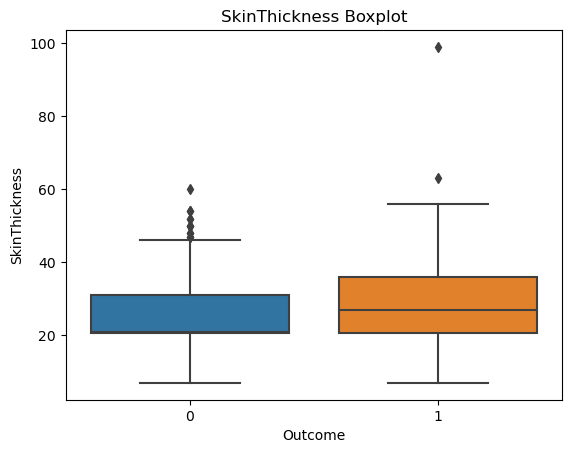

In [17]:
sns.boxplot(x='Outcome', y='SkinThickness', data=df).set_title('SkinThickness Boxplot')

The boxplot provides insights into the relationship between diabetes and skin thickness. According to the boxplot, the median skin thickness is higher for diabetic patients compared to non-diabetic patients. Non-diabetic patients have a median skin thickness around 20, whereas diabetic patients have a median skin thickness around 30. This suggests that skin thickness tends to be greater in diabetic individuals.

The boxplot also indicates that the distribution of skin thickness for diabetic patients has a more extended upper tail, with increased values near 30, while non-diabetic patients have a more concentrated distribution around 20. This variation in distribution implies that skin thickness can potentially serve as an indicator of diabetes.

### Insulin and Diabetes

Text(0.5, 1.0, 'Insulin vs Diabetes')

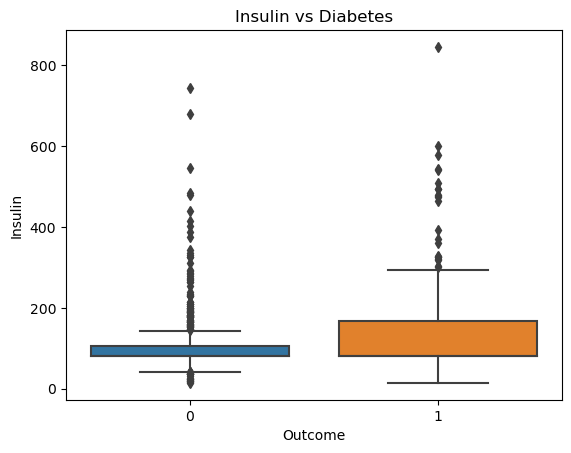

In [18]:
sns.boxplot(x='Outcome',y='Insulin',data=df).set_title('Insulin vs Diabetes')

Insulin is a crucial hormone that plays a significant role in regulating glucose metabolism. It facilitates the body's efficient utilization of sugars, fats, and proteins. Any alteration in the insulin levels can lead to changes in glucose levels as well. Both the boxplot and the data analysis reveal the distribution of insulin levels in patients.

For non-diabetic patients, the insulin level is clustered around 100, whereas in diabetic patients, it is concentrated around 200. The boxplot highlights the difference in median insulin levels between the two groups. Non-diabetic patients have lower median insulin levels compared to diabetic patients.

The boxplot also illustrates that the distribution of insulin levels is more spread out around 100 for non-diabetic patients, while for diabetic patients, it is more contracted with some spread in higher insulin levels.

Based on this analysis, it appears that insulin level could serve as a reliable indicator of diabetes.


### BMI and Diabetes

Text(0.5, 1.0, 'BMI vs Diabetes')

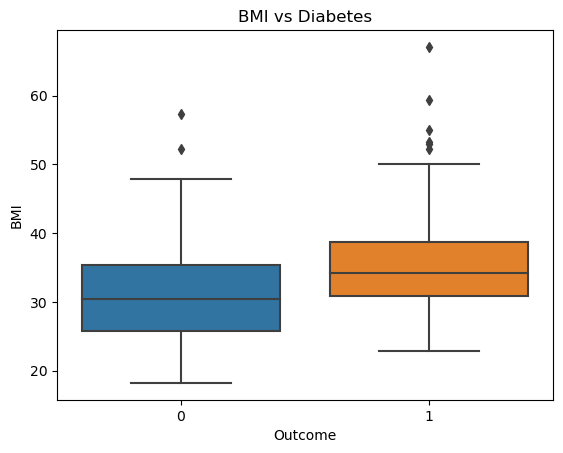

In [19]:
sns.boxplot(x='Outcome',y='BMI',data=df).set_title('BMI vs Diabetes')

The boxplot analysis emphasizes the significance of BMI in predicting diabetes. Non-diabetic patients tend to have a normal BMI, falling within the range of 25 to 35. In contrast, diabetic patients have a higher BMI, typically greater than 35, indicating a higher prevalence of obesity among diabetic individuals.

The boxplot allows us to observe the difference in median BMI between the two groups. Non-diabetic patients have a lower median BMI compared to diabetic patients.

BMI's role in diabetes prediction is evident from the analysis. Obese individuals, with a BMI exceeding 35, are more likely to be diabetic, while non-diabetic patients typically have a BMI within the normal range.

### Diabetes Pedigree Function and Diabetes Outcome

Text(0.5, 1.0, 'DiabetesPedigreeFunction vs Diabetes')

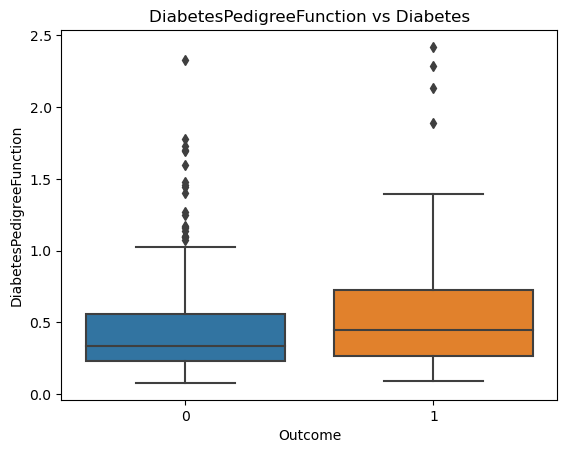

In [20]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df).set_title('DiabetesPedigreeFunction vs Diabetes')

the role of Diabetes Pedigree Function (DPF) in predicting diabetes likelihood. Patients with lower DPF values are significantly less likely to have diabetes, while those with higher DPF values are much more likely to be diabetic.

The boxplot reveals the difference in median DPF values between non-diabetic and diabetic patients. Non-diabetic patients typically have lower median DPF values compared to diabetic patients.

Based on the boxplot analysis, it is evident that DPF is a good indicator of diabetes. A higher DPF value is associated with an increased likelihood of having diabetes. In contrast, non-diabetic patients tend to have lower DPF values, indicating a reduced probability of being diabetic.
\section{Visualization results}
summary provides valuable insights into how the mean values of different attributes vary between patients with and without diabetes (Outcome = 1 and Outcome = 0, respectively). It allows us to observe potential differences in attribute values that might be associated with the presence or absence of diabetes. For example, we can see that patients with diabetes tend to have higher mean values for "Glucose," "BloodPressure," "SkinThickness," "Insulin," "BMI," "DiabetesPedigreeFunction," and "Age" compared to those without diabetes.

In [21]:
# Get statistical summary of the numeric columns
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


df.to_csv('filled_data.csv', index=False)


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### Correleation Matrix

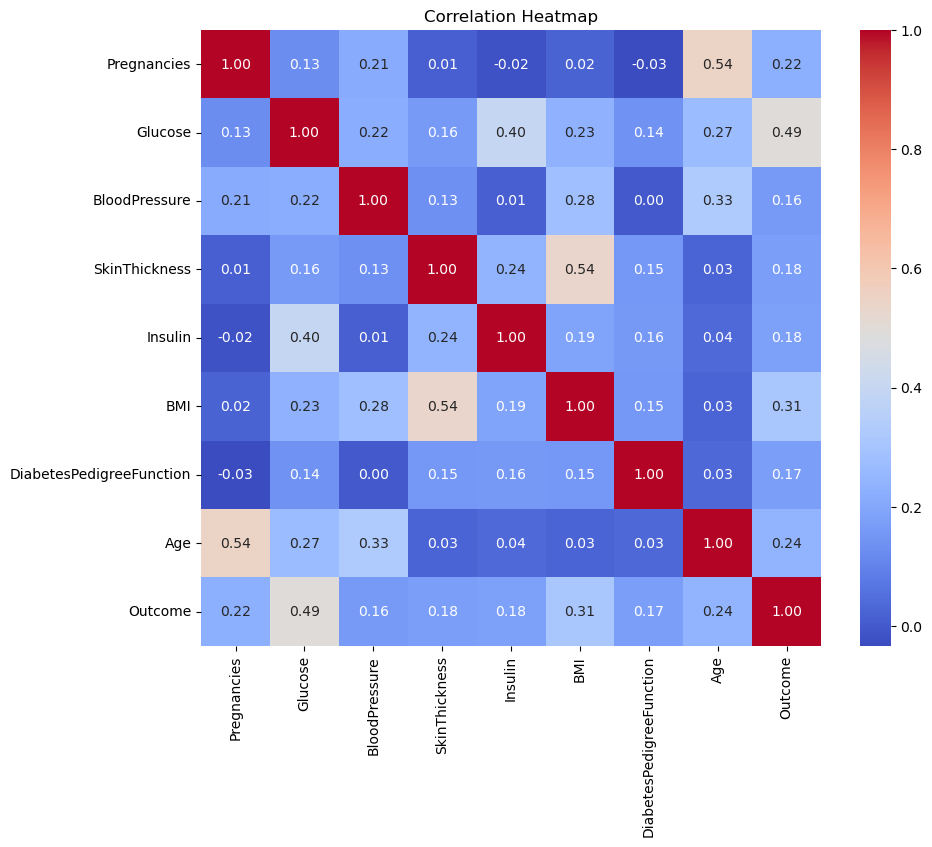

In [26]:
# Correlation heatmap to see the relationship between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


The correlation matrix is a powerful tool that allows us to visualize the relationships between different attributes or columns in the dataset. By examining the correlation values, we can gain insights into how strongly one attribute is related to another.

- The correlation between "Glucose" and "Outcome" is 0.49, indicating a moderate positive correlation. This suggests that the "Glucose" attribute plays an important role in predicting whether a patient has diabetes or not. As the glucose concentration increases, the likelihood of diabetes also tends to increase.

- Similarly, the correlation between "Insulin" and "Glucose" is 0.42, which shows a moderate positive correlation. This means that the level of insulin in the blood tends to increase as the glucose concentration increases.

- The correlation of 0.54 between "Pregnancies" and "Age" indicates a moderate positive relationship. This suggests that as the number of pregnancies increases, the patient's age is also likely to be higher.

- On the other hand, the rest of the attributes do not exhibit significant correlations with each other, meaning that they are relatively independent of one another.

### To get deep comparsion of mean of all attributes as we saw in boxplot visualization

In [27]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


### preparing the data set for Machine learning modelling

In [28]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [29]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [30]:
X = standardized_data
Y = df['Outcome']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

# svm

In [35]:
#building model

svm = SVC(kernel='linear', random_state=0)


In [36]:
 #training the model
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [37]:
#training the model
svm.score(X_train, Y_train)

0.7801302931596091

Following the SVM model's training, an assessment is conducted on the training data itself. The training accuracy is calculated as the percentage of correctly predicted labels within the training dataset. In this context, the training accuracy approximates 0.78 (or 78\%), signifying that the model accurately predicted the class for around 78\% of the training data.

In [38]:
#training the model
svm.score(X_test, Y_test)

0.7792207792207793

The genuine evaluation of the model's performance occurs on the distinct test dataset, which remained unseen during training. The testing accuracy is the percentage of accurately predicted labels within the test dataset. In this scenario, the testing accuracy stands at approximately 0.77 (or 77.922\%), indicating that the model correctly predicted the class for about 77.922\% of the test data.

In [39]:
#predicting outcomes
svm_pred = svm.predict(X_test)

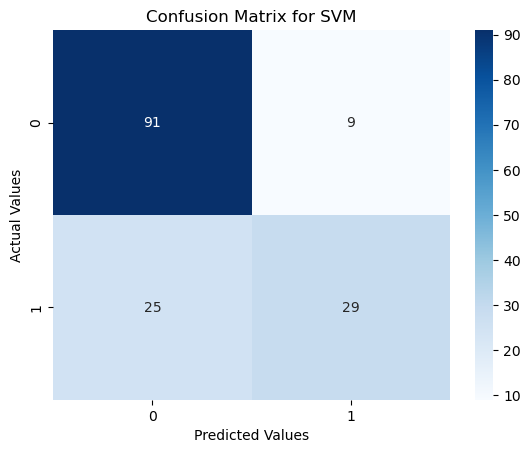

In [40]:
sns.heatmap(confusion_matrix(Y_test, svm_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for SVM')
plt.show()

In [41]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



In [55]:
confusion_matrix(Y_test, svm_pred)

array([[91,  9],
       [25, 29]])

### Prediction  on dataset

In [43]:
inputdata = (1,89.0,66.0,23.0,94.0,28.1,0.167,21)

# changing the input_data to numpy array
inputdataasnumpyarray = np.asarray(inputdata)

# reshape the array as we are predicting for one instance
inputdatareshaped = inputdataasnumpyarray.reshape(1,-1)

# standardize the input data
stddata = scaler.transform(inputdatareshaped)
print(stddata)

predictions = svm.predict(stddata)
print(predictions)

if (predictions[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -1.07448042 -0.51658286 -0.37470037 -0.26510678 -0.6332224
  -0.92076261 -1.04154944]]
[0]
The person is not diabetic


/home/umairchohan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In the given scenario, the input data `inputdata` is a set of feature values for a particular individual, randomly selected from the dataset. The input data contains the following features (in order):

- Pregnancies: 1
- Glucose: 89.0
- BloodPressure: 66.0
- SkinThickness: 23.0
- Insulin: 94.0
- BMI: 28.1
- DiabetesPedigreeFunction: 0.167
- Age: 21

These feature values are used to make predictions about whether the person is diabetic (`Outcome` = 1) or not diabetic (`Outcome` = 0).

The prediction `[0]` confirms that the person is not diabetic according to the model's decision boundary.

The classifier correctly predicted that the person is not diabetic, and the prediction is consistent with the actual outcome in the dataset. This indicates that the model is performing reasonably well on this particular instance.

# Naive Bayes

In [44]:
# Create an instance of the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train, Y_train)

# Make predictions on the training data
X_train_prediction = nb_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# Make predictions on the test data
X_test_prediction = nb_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Naive Bayes Test Data Accuracy:", test_data_accuracy)
print("Naive Bayes Training Data Accuracy:", training_data_accuracy)


Naive Bayes Test Data Accuracy: 0.7272727272727273
Naive Bayes Training Data Accuracy: 0.752442996742671


A training data accuracy of 0.75 suggests that the Naive Bayes classifier has learned patterns within the training dataset, enabling it to predict the class labels of instances it has already encountered.

The reported test data accuracy of 0.73 and training data accuracy of 0.75 provide insights into the Naive Bayes classifier's performance on both unseen and training data, respectively. The evaluation of these accuracies helps in assessing the classifier's ability to generalize and make accurate predictions

In [46]:

print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



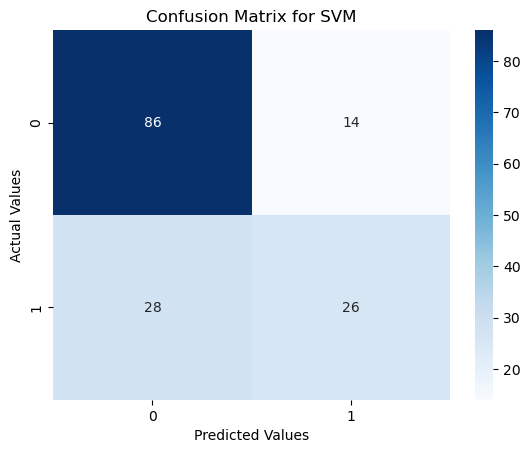

In [47]:

sns.heatmap(confusion_matrix(Y_test,  X_test_prediction), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for SVM')
plt.show()

The confusion matrix provides a granular view of the classifier's behavior, particularly its ability to correctly identify positive instances (sensitivity) and negative instances (specificity). These metrics offer insights into the classifier's strengths and weaknesses and are crucial for assessing its suitability for the specific task.

### Prediction  on dataset

In [45]:


# Input data for prediction
input_data = (1,89.0,66.0,23.0,94.0,28.1,0.167,21)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the same scaler
std_data = scaler.transform(input_data_reshaped)

# Make predictions using the trained Naive Bayes classifier
predictions = nb_classifier.predict(std_data)

if predictions[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is not diabetic


/home/umairchohan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Diabetes Prediction using a Trained Model

In this section, we analyze the prediction made by our trained model for a specific individual based on their feature values. The goal is to determine whether the individual is diabetic (`Outcome` = 1) or not diabetic (`Outcome` = 0).

## Input Data

The input data, denoted as `inputdata`, represents the feature values of a particular individual, randomly selected from our dataset. The features, in order, include:

- Pregnancies: 1
- Glucose: 89.0
- BloodPressure: 66.0
- SkinThickness: 23.0
- Insulin: 94.0
- BMI: 28.1
- DiabetesPedigreeFunction: 0.167
- Age: 21

## Prediction

Our trained model produces a prediction based on these input features. The result of the prediction is `[0]`, indicating that the model predicts the individual to be not diabetic.

## Model Performance

The prediction `[0]` aligns with the model's decision boundary. In this case, it confirms that, according to our model's analysis of the provided features, the individual is not diabetic.

This prediction is consistent with the actual outcome recorded in the dataset, suggesting that the model is performing reasonably well on this specific instance.


In [48]:
cm = confusion_matrix(Y_test, X_test_prediction)

# Display the confusion matrix as a matrix of values
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[86 14]
 [28 26]]


# Logistics Regression

In [53]:


clf = LogisticRegression(max_iter=100, multi_class="ovr", penalty="l1", solver="saga")
clf.fit(X_train, Y_train)

#training accuracy
clf.score(X_train,Y_train)


0.7817589576547231

A training accuracy of 0.782 indicates that the Logistic Regression model has learned patterns and relationships present in the training data. It has achieved a level of proficiency in making accurate predictions for instances it has encountered during training.

In [54]:
clf.score(X_test,Y_test)

0.7727272727272727

The logistic regression model with L1 penalty and solver 'saga' achieved an accuracy of 0.782 on the training data and 0.773 on the test data. These scores demonstrate the model's ability to learn from the training data and generalize well to new, unseen data.

In [51]:
#predicted outcomes
clf_pred = clf.predict(X_test)

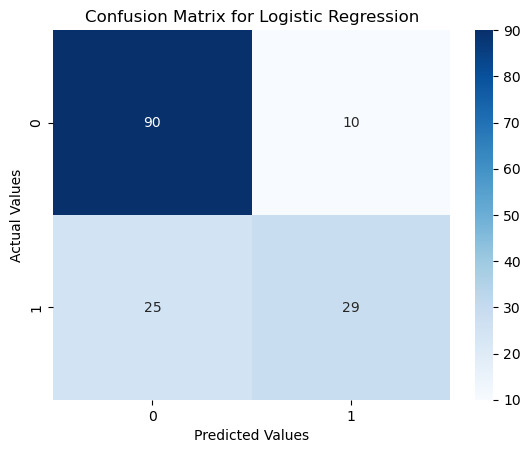

In [52]:

sns.heatmap(confusion_matrix(Y_test, clf_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [54]:
input_data = (1,89.0,66.0,23.0,94.0,28.1,0.167,21)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction =clf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -1.07448042 -0.51658286 -0.37470037 -0.26510678 -0.6332224
  -0.92076261 -1.04154944]]
[0]
The person is not diabetic


/home/umairchohan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Diabetes Prediction using Logistic Regression

In this section, we present the result of applying the trained logistic regression model to predict diabetes for a given input data point.

## Input Data

The input data for the prediction is as follows:

- Pregnancies: 2
- Glucose: 19.70
- BloodPressure: 70.0
- SkinThickness: 45.0
- Insulin: 543.0
- BMI: 30.5
- DiabetesPedigreeFunction: 0.158
- Age: 53

## Prediction

The trained logistic regression model yielded the following output:
[[-0.84488505 -1.07448042 -0.51658286 -0.37470037 -0.26510678 -0.6332224
  -0.92076261 -1.04154944]]

[0]
The person is not diabetic